<a href="https://colab.research.google.com/github/prajwalwanjari/Design_optimization_assignments/blob/Assignment-2/DO_HW2_Q2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Design Optimization - HW2**

**Prajwal Wanjari**

**1222575718**

**Q2.(b)**


Implement the gradient descent and Newton’s algorithm for solving the problem. Attach your codes in the report, along with a short summary of your findings. The summary should include: 

(1) The initial points tested; 

(2) corresponding solutions;


(3) A log-linear convergence plot.

**Solution-**

In [21]:
#importing essential libraries
import numpy as np                                                      
import matplotlib.pyplot as plt

In [22]:
# Using Inexact line search / Armijo Line search algorithm

def f_calculator(alpha,x2,x3):
  #t can be any value between 0 & 1; t is reducing slope between approximation lines  
  t = 0.7                                                                     
  obj_func = objective_function(x2,x3)
  grad = gradient(x2,x3)
  # print gradient
  # f(x) = 5*x2^2+10*x3^2+12*x2*x3-8*x2-14*x3+5
  f_alpha_grad= 5*((x2-alpha*grad[0][0])**2) + 10*((x3 - alpha*grad[1][0] )**2) + 12*(x2-alpha*grad[0][0])*(x3 - alpha*grad[1][0]) - 14*(x3 - alpha*grad[1][0]) - 8*(x2-alpha*grad[0][0]) + 5
  # phi = f(x)-t*grad^T*grad*alpha
  phi = obj_func - t*(np.linalg.norm(grad)**2)*alpha
  return (f_alpha_grad-phi)     

def gradient(x2,x3):
  return ([10*x2 + 12*x3 - 8],
          [12*x2 + 20*x3 - 14])       

def objective_function(x2,x3):
  return 5*(x2**2) + 10*(x3**2) + 12*x2*x3 - 14*x3 - 8*x2 + 5     

def inexact_line_search(alpha,x2,x3):
  counter = 0                         #termination criterion/counter
  while counter<100:
    s = f_calculator(alpha,x2,x3)     #calling function    
    if s>0:
      alpha = alpha*0.5
      counter = counter+1 
    else:
      # print("Solution not converging")
      break
  return alpha


Initial guess is: x1:1 , x2:0 , x3:0
The point in the plane x1+2*x2+3*x3=1 that is nearest to the point (−1, 0, 1) is: 
x1:-1.0714325370678943,x2:-0.14282110558427424,x3:0.785691582745481
Minimum Distance:  0.2672612453357342


Text(0, 0.5, 'log(error)')

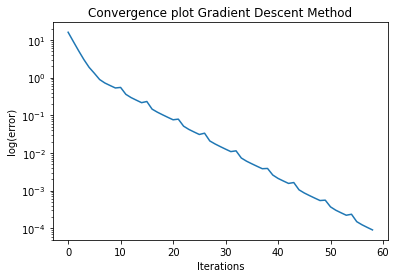

In [23]:
#initializing values/guesses
x2 = 0
x3 = 0
to = 0.0001
grad = gradient(x2,x3)
grad_e = np.linalg.norm(grad)

counter = 0
c = [counter]
error = [grad_e]
while grad_e>to and counter<100:
  alpha = 1                                 #
  alpha = inexact_line_search(alpha,x2,x3)  #
  x2 = x2 - alpha*grad[0][0]
  x3 = x3 - alpha*grad[1][0]
  grad = gradient(x2,x3)
  grad_e = np.linalg.norm(grad)
  error.append(grad_e)
  counter = counter + 1
  c.append(counter)

print(f'Initial guess is: x1:1 , x2:0 , x3:0')
x1 = 1-2*x2-3*x3
print("The point in the plane x1+2*x2+3*x3=1 that is nearest to the point (−1, 0, 1) is: ")
print(f'x1:{x1},x2:{x2},x3:{x3}')

d = (x1+1)**2 + x2**2 + (x3-1)**2
print("Minimum Distance: ",np.sqrt(d))

#log-linear convergence plot
plt.plot(c,error)
plt.yscale("log")
plt.title("Convergence plot Gradient Descent Method")
plt.xlabel("Iterations")
plt.ylabel("log(error)")

Initial guess is: x1:1 , x2:0 , x3:0
The point in the plane x1+2*x2+3*x3=1 that is nearest to the point (−1, 0, 1) is: 
x1:-1.071428571428572,x2:-0.1428571428571428,x3:0.7857142857142858
Minimum Distance:  0.26726124191242445


Text(0, 0.5, 'log(error)')

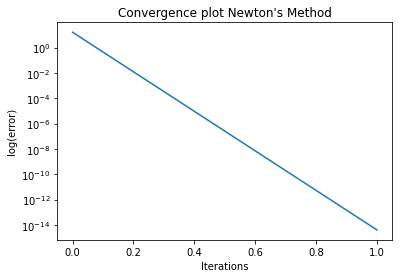

In [24]:
#using Newton's Method

#initializing values/guesses
x2 = 0
x3 = 0
to = 0.0001
grad = gradient(x2,x3)
grad_e = np.linalg.norm(grad)
H = ([10,12],[12,20])             #Hessian matrix
H_inv = np.linalg.inv(H)          #inverse of Hessian matrix

counter = 0
c = [counter]
error = [grad_e]
while grad_e>to and counter<100:
  dx = np.matmul(H_inv,grad)      #
  x2 = x2 - dx[0][0]
  x3 = x3 - dx[1][0]
  grad = gradient(x2,x3)
  grad_e = np.linalg.norm(grad)
  error.append(grad_e)
  counter = counter + 1
  c.append(counter)

print(f'Initial guess is: x1:1 , x2:0 , x3:0')
x1 = 1-2*x2-3*x3
print("The point in the plane x1+2*x2+3*x3=1 that is nearest to the point (−1, 0, 1) is: ")
print(f'x1:{x1},x2:{x2},x3:{x3}')

d = (x1+1)**2 + x2**2 + (x3-1)**2
print("Minimum Distance: ",np.sqrt(d))

#log-linear convergence plot
plt.plot(c,error)
plt.yscale("log")
plt.title("Convergence plot Newton's Method")
plt.xlabel("Iterations")
plt.ylabel("log(error)")

In the inexact gradient decent method, variable t is representing reducing slope between the approximation lines where t can be any value between 0 & 1. In this question, as we move towards value of t= 0.8 & 0.9; we get a more consistent convergence plot, whereas the graph overshoots it values if value of t>=1;

In Newton's method, as the objective is quadratic, it only takes one step to compute convergence plot.


From both methods, the initial guesses are x1:1 , x2:0 , x3:0 ;

the point in the plane x1+2*x2+3*x3=1 that is nearest to the point (−1, 0, 1) is: 
x1:-1.071428571428572, x2:-0.1428571428571428, x3:0.7857142857142858

and the minimum distance between both points is 0.26726124191242445.